Özge Karasu - 26508

Serkan Kütük - 27054


In [ ]:
import pandas as  pd
""" dont show warnings """
import warnings
warnings.filterwarnings('ignore')


## Step 1: Load the Dataset

In [ ]:
data = pd.read_csv('german_credit_data.csv') # Read the data
data.head() # Show the first 5 rows

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
""" drop the first column """
data = data.drop(data.columns[0], axis=1) # Drop the first column
data.head() # Show the first 5 rows

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## Step 2: Handle Missing Values

In [ ]:
""" show missing values """
data.isnull().sum() # Show the number of missing values in each column

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
"""Impute missing categorical values with mean"""
data['Saving accounts'].fillna(data['Saving accounts'].mode()[0], inplace=True) # Impute missing values with mean
data['Checking account'].fillna(data['Checking account'].mode()[0], inplace=True) # Impute missing values with mean
data.isnull().sum() # Show the number of missing values in each column


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

## Step 3: The Dataset

### Age (numeric)

### Sex (text: male, female)

### Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

### Housing (text: own, rent, or free)

### Saving accounts (text - little, moderate, quite rich, rich)

### Checking account (text - 'little' 'moderate' 'rich')

### Credit amount (numeric, in DM)

### Duration (numeric, in month)

### Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

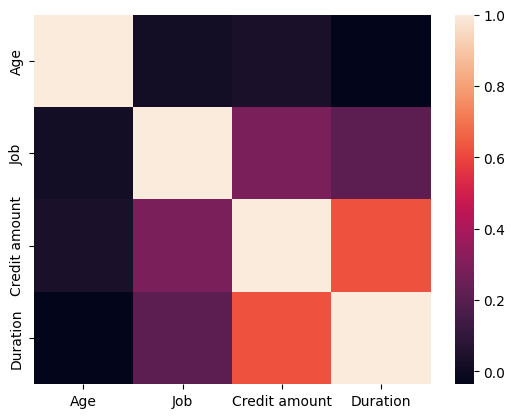

In [ ]:
""" show correlation matrix """
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr() # Compute the correlation matrix
sns.heatmap(corr, 
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values) # Plot the correlation matrix
plt.show()

In [ ]:
"""show column types"""
data.dtypes # Show the data types of each column


Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [ ]:
"""show every calegorical columns unique values"""
for col in data.columns: # Iterate over each column
    if data[col].dtype == 'object':  # If column is categorical
        print(col, ': ', data[col].unique()) # Print the unique elements of the column
        print(data[col].value_counts()) # Print the frequency of each element
        print('___________________________________________________________') # Print a separator





Sex :  ['male' 'female']
male      690
female    310
Name: Sex, dtype: int64
___________________________________________________________
Housing :  ['own' 'free' 'rent']
own     713
rent    179
free    108
Name: Housing, dtype: int64
___________________________________________________________
Saving accounts :  ['little' 'quite rich' 'rich' 'moderate']
little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
___________________________________________________________
Checking account :  ['little' 'moderate' 'rich']
little      668
moderate    269
rich         63
Name: Checking account, dtype: int64
___________________________________________________________
Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs               

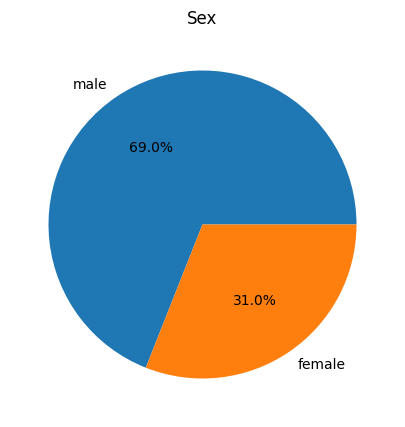

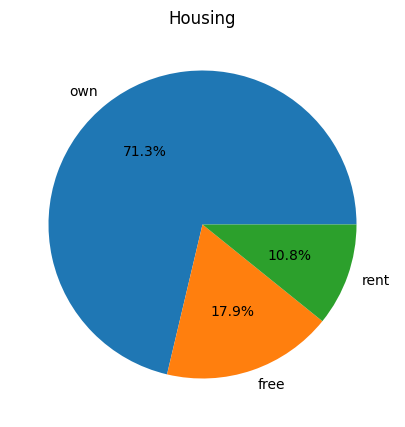

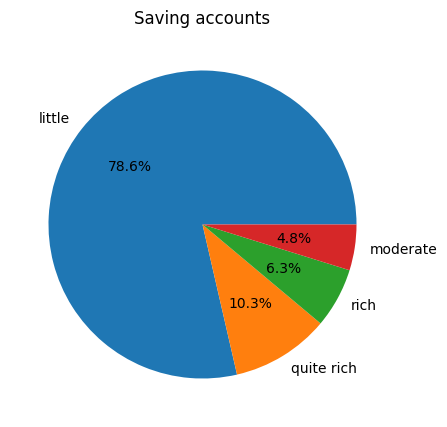

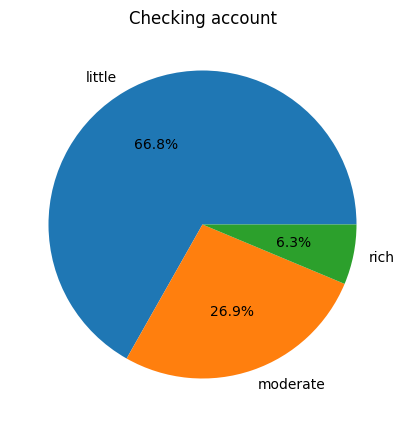

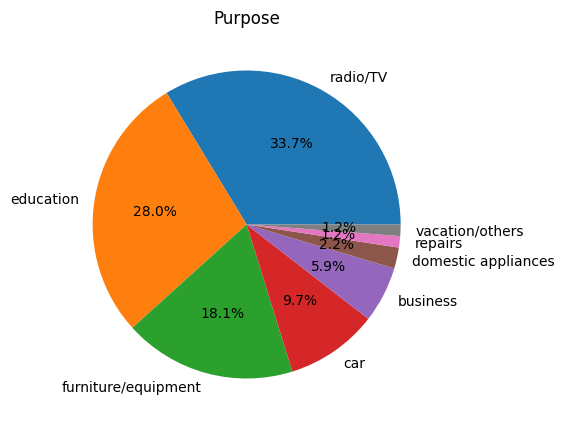

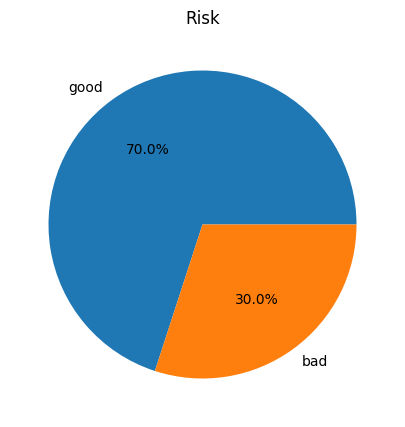

In [ ]:
""" show categorical columns values count in a pie plot """
import matplotlib.pyplot as plt
import seaborn as sns

for col in data.columns: # Iterate over each column
    if data[col].dtype == 'object': # If column is categorical
        plt.figure(figsize=(10, 5)) # Set the figure size
        plt.pie(data[col].value_counts(), labels=data[col].unique(), autopct='%1.1f%%') # Plot a pie chart
        plt.title(col) # Set the title of the plot
        plt.show()



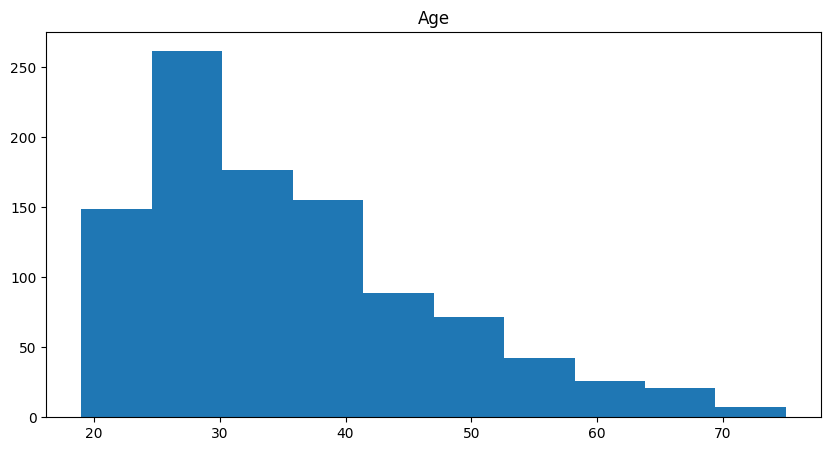

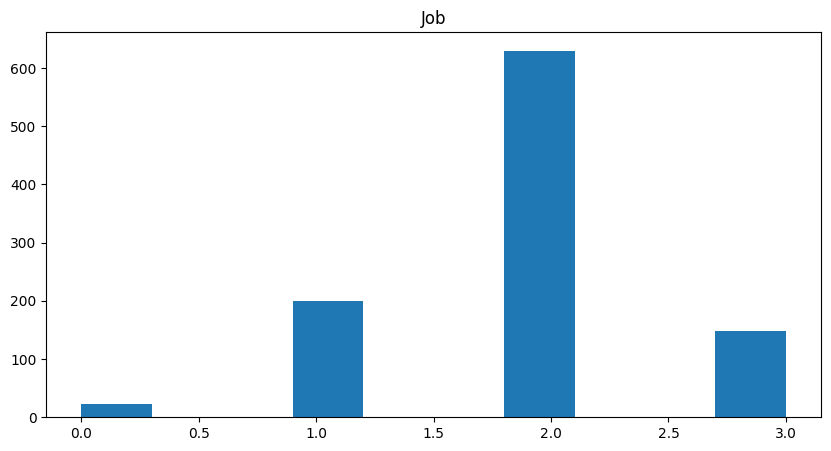

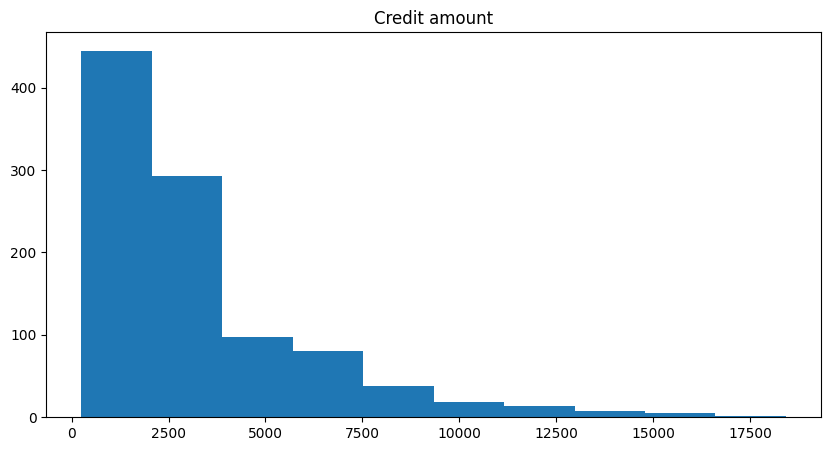

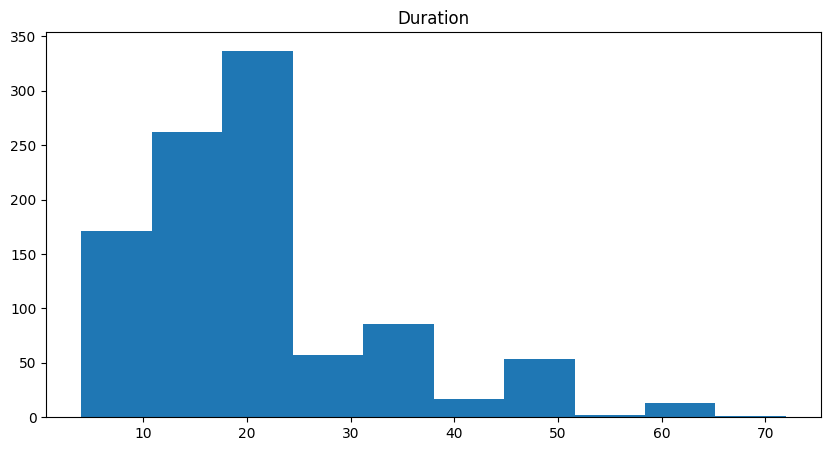

In [ ]:
""" show non categorical columns values count in a histogram """
for col in data.columns: # Iterate over each column
    if data[col].dtype != 'object': # If column is not categorical
        plt.figure(figsize=(10, 5)) # Set the figure size 
        plt.hist(data[col]) # Plot a histogram
        plt.title(col) # Set the title of the plot
        plt.show()

## Step 4: One-hot encoding for categorical features

In [ ]:
""" Risk is the target column """
X = data.drop('Risk', axis=1) # Drop the target column
y = data['Risk'] # Set the target column as target

""" in y bad is 0 and good is 1, so we need to change it to 0 and 1 """
y = y.map({'bad': 0, 'good': 1}) # Map the values of the target column to 0 and 1
y.value_counts() # Show the frequency of each value


1    700
0    300
Name: Risk, dtype: int64

In [ ]:
"""job column has 3 unique values, so we can use one hot encoding"""
X = pd.get_dummies(X, columns=['Job'], drop_first=True) # One hot encode the column
X.head() 


,Age,Sex,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Job_1,Job_2,Job_3
0,67,male,own,little,little,1169,6,radio/TV,0,1,0
1,22,female,own,little,moderate,5951,48,radio/TV,0,1,0
2,49,male,own,little,little,2096,12,education,1,0,0
3,45,male,free,little,little,7882,42,furniture/equipment,0,1,0
4,53,male,free,little,little,4870,24,car,0,1,0


In [ ]:
"""show categorical columns names"""
cat_cols = [col for col in X.columns if X[col].dtype == 'object'] # Get the categorical columns
cat_cols

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [ ]:
""" one hot encoding for categorical columns in X """
X = pd.get_dummies(X, columns=cat_cols, drop_first=True) # One hot encode the categorical columns
X.head()


,Age,Credit amount,Duration,Job_1,Job_2,Job_3,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,...,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1169,6,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,22,5951,48,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,49,2096,12,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,7882,42,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,4870,24,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Step 5: Split the Dataset

In [ ]:
""" split data to train and test with kfold """
from sklearn.model_selection import KFold # Import KFold

kf = KFold(n_splits=4, shuffle=True, random_state=42) # Initialize the splitter

for train_index, test_index in kf.split(X): # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] # Get the train and test data
    y_train, y_test = y[train_index], y[test_index] # Get the train and test targets


""" show train and test data shape """
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(750, 21)
(250, 21)
(750,)
(250,)


## Step 6: Feature Scaling

In [ ]:
""" Use standard scaler to scale data """
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() # Initialize the scaler
X_train = scaler.fit_transform(X_train) # Scale the train data
X_test = scaler.transform(X_test) # Scale the test data

## Step 7: Train Models

In [ ]:
""" Use logistic regression to predict with grid search """
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression() # Initialize the model
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear', 'saga']} # Set the parameters to search for
grid_search = GridSearchCV(log_reg, params, cv=5, n_jobs=-1, verbose=1) # Initialize the grid search
grid_search.fit(X_train, y_train) # Fit the grid search
print(grid_search.best_params_) # Show the best parameters

""" predict with best params """
y_pred = grid_search.predict(X_test) # Predict the test data

""" show confusion matrix """
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred)) # Show the confusion matrix

""" show classification report """
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred)) # Show the classification report

""" show accuracy score """
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred)) # Show the accuracy score
log_reg_accuracy = accuracy_score(y_test, y_pred)



Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
[[  7  69]
 [  4 170]]
              precision    recall  f1-score   support

           0       0.64      0.09      0.16        76
           1       0.71      0.98      0.82       174

    accuracy                           0.71       250
   macro avg       0.67      0.53      0.49       250
weighted avg       0.69      0.71      0.62       250

0.708


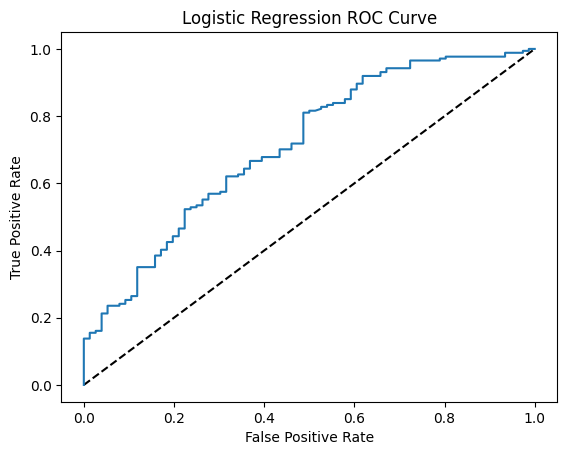

In [ ]:
""" roc curve """
from sklearn.metrics import roc_curve

y_pred_proba = grid_search.predict_proba(X_test)[:, 1] # Get the probabilities of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Compute the ROC curve

plt.plot([0, 1], [0, 1], 'k--') # Plot the diagonal
plt.plot(fpr, tpr, label='Logistic Regression') # Plot the ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


In [ ]:
""" use mlp classifier to predict with grid search """
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier() # Initialize the model
params = {'hidden_layer_sizes': [(10,), (50,), (100,)],
            'activation': ['relu', 'tanh',],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.001,],
            'learning_rate': ['constant', 'adaptive'],
            'max_iter': [100, 200]} # Set the parameters to search for
grid_search = GridSearchCV(mlp, params, cv=5, n_jobs=-1, verbose=1) # Initialize the grid search
grid_search.fit(X_train, y_train) # Fit the grid search
print(grid_search.best_params_)
y_pred = grid_search.predict(X_test) # Predict the test data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred)) # Show the accuracy score
mlp_accuracy = accuracy_score(y_test, y_pred)



Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'sgd'}
[[ 14  62]
 [  8 166]]
              precision    recall  f1-score   support

           0       0.64      0.18      0.29        76
           1       0.73      0.95      0.83       174

    accuracy                           0.72       250
   macro avg       0.68      0.57      0.56       250
weighted avg       0.70      0.72      0.66       250

0.72


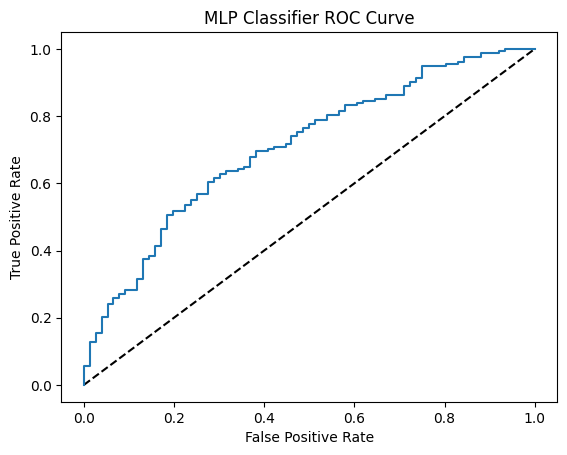

In [ ]:
""" roc curve """
y_pred_proba = grid_search.predict_proba(X_test)[:, 1] # Get the probabilities of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Compute the ROC curve

plt.plot([0, 1], [0, 1], 'k--') # Plot the diagonal
plt.plot(fpr, tpr, label='MLP Classifier') # Plot the ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Classifier ROC Curve')
plt.show()


In [ ]:
""" use knn to predict with grid search """
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # Initialize the model
params = {'n_neighbors': range(1, 21),
          'weights': ['uniform', 'distance'],
          'metric': ['euclidean', 'manhattan'],
          'leaf_size': range(1, 21)} # Set the parameters to search for
grid_search = GridSearchCV(knn, params, cv=5, n_jobs=-1, verbose=1) # Initialize the grid search
grid_search.fit(X_train, y_train) # Fit the grid search
print(grid_search.best_params_) # Show the best parameters

""" predict with best params """
y_pred = grid_search.predict(X_test) # Predict the test data

""" show confusion matrix """
print(confusion_matrix(y_test, y_pred)) # Show the confusion matrix

""" show classification report """
print(classification_report(y_test, y_pred)) # Show the classification report

""" show accuracy score """
print(accuracy_score(y_test, y_pred)) # Show the accuracy score
knn_accuracy = accuracy_score(y_test, y_pred)



Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
[[ 12  64]
 [  7 167]]
              precision    recall  f1-score   support

           0       0.63      0.16      0.25        76
           1       0.72      0.96      0.82       174

    accuracy                           0.72       250
   macro avg       0.68      0.56      0.54       250
weighted avg       0.70      0.72      0.65       250

0.716


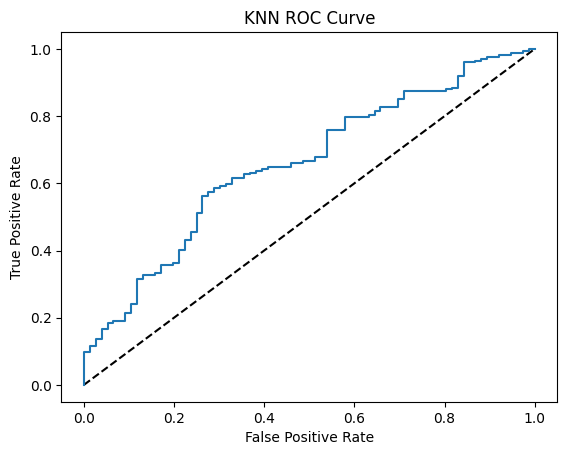

In [ ]:
""" roc curve """
y_pred_proba = grid_search.predict_proba(X_test)[:, 1] # Get the probabilities of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Compute the ROC curve

plt.plot([0, 1], [0, 1], 'k--') # Plot the diagonal
plt.plot(fpr, tpr, label='KNN') # Plot the ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()


In [ ]:
""" use decision tree to predict with grid search """
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
            'max_depth': range(1, 21),
            'min_samples_split': range(2, 21),
             'min_samples_leaf': range(1, 21)} # Set the parameters to search for
grid_search = GridSearchCV(dt, params, cv=5, n_jobs=-1, verbose=1) # Initialize the grid search
grid_search.fit(X_train, y_train) # Fit the grid search
print(grid_search.best_params_) # Show the best parameters
y_pred = grid_search.predict(X_test) # Predict the test data
print(confusion_matrix(y_test, y_pred)) # Show the confusion matrix
print(classification_report(y_test, y_pred)) # Show the classification report
print(accuracy_score(y_test, y_pred)) # Show the accuracy score
dt_accuracy = accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 30400 candidates, totalling 152000 fits
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 8, 'splitter': 'random'}
[[  7  69]
 [ 13 161]]
              precision    recall  f1-score   support

           0       0.35      0.09      0.15        76
           1       0.70      0.93      0.80       174

    accuracy                           0.67       250
   macro avg       0.52      0.51      0.47       250
weighted avg       0.59      0.67      0.60       250

0.672


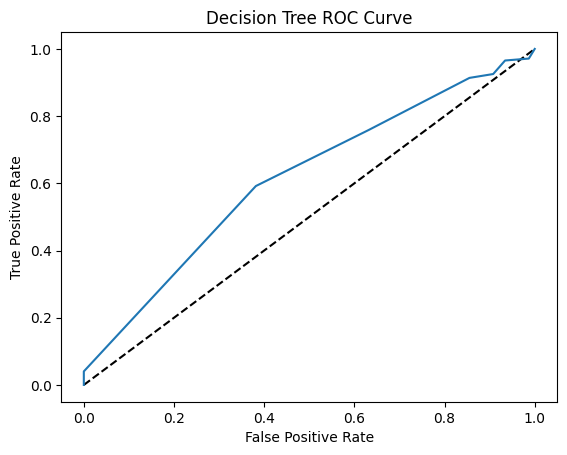

In [ ]:
"""roc curve"""
y_pred_proba = grid_search.predict_proba(X_test)[:, 1] # Get the probabilities of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Compute the ROC curve

plt.plot([0, 1], [0, 1], 'k--') # Plot the diagonal
plt.plot(fpr, tpr, label='Decision Tree') # Plot the ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()


## Step 7: Improve 

In [ ]:
""" feature elimination with rfe """
from sklearn.feature_selection import RFE # Import RFE

log_reg = LogisticRegression()
rfe = RFE(log_reg, n_features_to_select=10) # Initialize RFE
rfe.fit(X_train, y_train) # Fit RFE
print(rfe.support_) # Print the features that are kept
print(rfe.ranking_) # Print the features that are ranked
print(X.columns[rfe.support_]) # Print the features that are kept

""" use logistic regression with rfe features """
log_reg = LogisticRegression()
log_reg.fit(X_train[:, rfe.support_], y_train) # Fit the model
y_pred = log_reg.predict(X_test[:, rfe.support_]) # Predict the test data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
log_reg_rfe_accuracy = accuracy_score(y_test, y_pred)



[ True False  True False  True False  True  True False False  True  True
  True False False False False False  True  True False]
[ 1 12  1  3  1  9  1  1  2 11  1  1  1  6  8 10  4  5  1  1  7]
Index(['Age', 'Duration', 'Job_2', 'Sex_male', 'Housing_own',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_moderate', 'Purpose_radio/TV', 'Purpose_repairs'],
      dtype='object')
[[ 14  62]
 [  6 168]]
              precision    recall  f1-score   support

           0       0.70      0.18      0.29        76
           1       0.73      0.97      0.83       174

    accuracy                           0.73       250
   macro avg       0.72      0.57      0.56       250
weighted avg       0.72      0.73      0.67       250

0.728


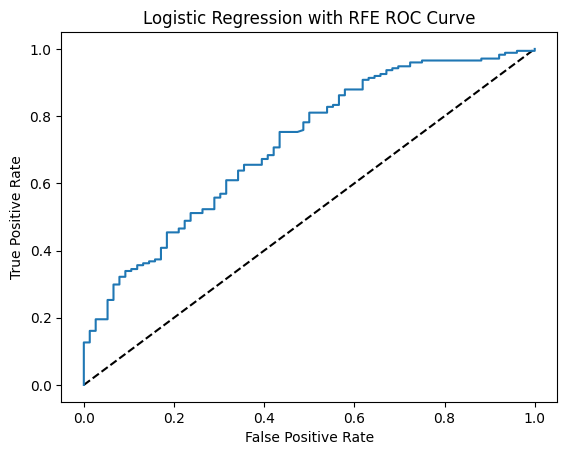

In [ ]:
""" roc curve """
y_pred_proba = log_reg.predict_proba(X_test[:, rfe.support_])[:, 1] # Get the probabilities of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Compute the ROC curve

plt.plot([0, 1], [0, 1], 'k--') # Plot the diagonal
plt.plot(fpr, tpr, label='Logistic Regression with RFE') # Plot the ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression with RFE ROC Curve')
plt.show()


In [ ]:
""" use xgboost to predict with grid search """
from xgboost import XGBClassifier

xgb = XGBClassifier()
params = {'n_estimators': [300, 400, 500, 600],
            'max_depth': range(1, 20),
            'learning_rate': [0.001,0.01,0.1],
            'booster': ['gbtree', 'gblinear', 'dart']} # Set the parameters to search for
grid_search = GridSearchCV(xgb, params, cv=5, n_jobs=-1, verbose=1) # Initialize the grid search
grid_search.fit(X_train, y_train) # Fit the grid search
print(grid_search.best_params_) # Show the best parameters
y_pred = grid_search.predict(X_test)
print(confusion_matrix(y_test, y_pred)) # Show the confusion matrix
print(classification_report(y_test, y_pred)) # Show the classification report
print(accuracy_score(y_test, y_pred)) # Show the accuracy score
xgb_accuracy = accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 400}
[[ 19  57]
 [ 13 161]]
              precision    recall  f1-score   support

           0       0.59      0.25      0.35        76
           1       0.74      0.93      0.82       174

    accuracy                           0.72       250
   macro avg       0.67      0.59      0.59       250
weighted avg       0.69      0.72      0.68       250

0.72


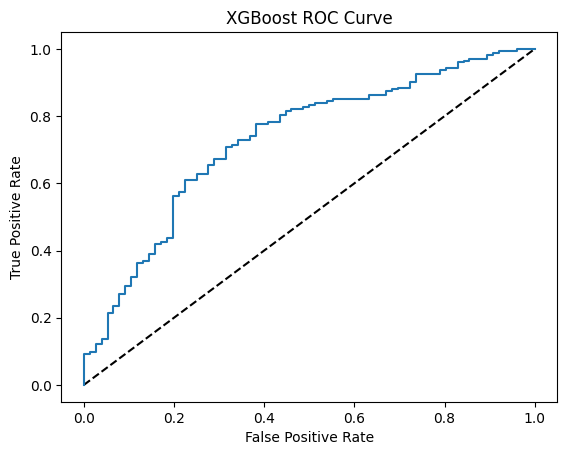

In [ ]:
"""roc curve"""
y_pred_proba = grid_search.predict_proba(X_test)[:, 1] # only positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # false positive rate, true positive rate, thresholds

plt.plot([0, 1], [0, 1], 'k--') # plot diagonal
plt.plot(fpr, tpr, label='XGBoost') # plot roc curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.show()


## Step 8:Compare the models


In [ ]:
"""print all accuracies"""
print("Logistic Regression Accuracy: ", log_reg_accuracy)
print("MLP Accuracy: ", mlp_accuracy)
print("KNN Accuracy: ", knn_accuracy)
print("Decision Tree Accuracy: ", dt_accuracy)
print("Logistic Regression RFE Accuracy: ", log_reg_rfe_accuracy)
print("XGBoost Accuracy: ", xgb_accuracy)


Logistic Regression Accuracy:  0.708
MLP Accuracy:  0.716
KNN Accuracy:  0.716
Decision Tree Accuracy:  0.672
Logistic Regression RFE Accuracy:  0.728
XGBoost Accuracy:  0.72


In [ ]:
"""Step 8: Compare the models"""
# Determine the best-performing model
best_model = max(log_reg_accuracy, mlp_accuracy, knn_accuracy, dt_accuracy, log_reg_rfe_accuracy, xgb_accuracy)
# Print the summary
print("We tried multiple algorithms for the German Credit Data problem and observed their performances "
      "after hyper-parameter optimization for each one separately.")
print("The best-performing model was:")
if best_model == log_reg_accuracy:
    print("Logistic Regression with {}% accuracy.".format(round(log_reg_accuracy * 100, 2)))
elif best_model == mlp_accuracy:
    print("MLP Classifier with {}% accuracy.".format(round(mlp_accuracy * 100, 2)))
elif best_model == knn_accuracy:
    print("KNN Classifier with {}% accuracy.".format(round(knn_accuracy * 100, 2)))
elif best_model == dt_accuracy:
    print("Decision Tree Classifier with {}% accuracy.".format(round(dt_accuracy * 100, 2)))
elif best_model == xgb_accuracy:
    print("XGBoost Classifier with {}% accuracy.".format(round(xgb_accuracy * 100, 2)))
elif best_model == log_reg_rfe_accuracy:
    print("Logistic Regression with RFE features with {}% accuracy.".format(round(log_reg_rfe_accuracy * 100, 2)))


We tried multiple algorithms for the German Credit Data problem and observed their performances after hyper-parameter optimization for each one separately.
The best-performing model was:
Logistic Regression with RFE features with 72.8% accuracy.


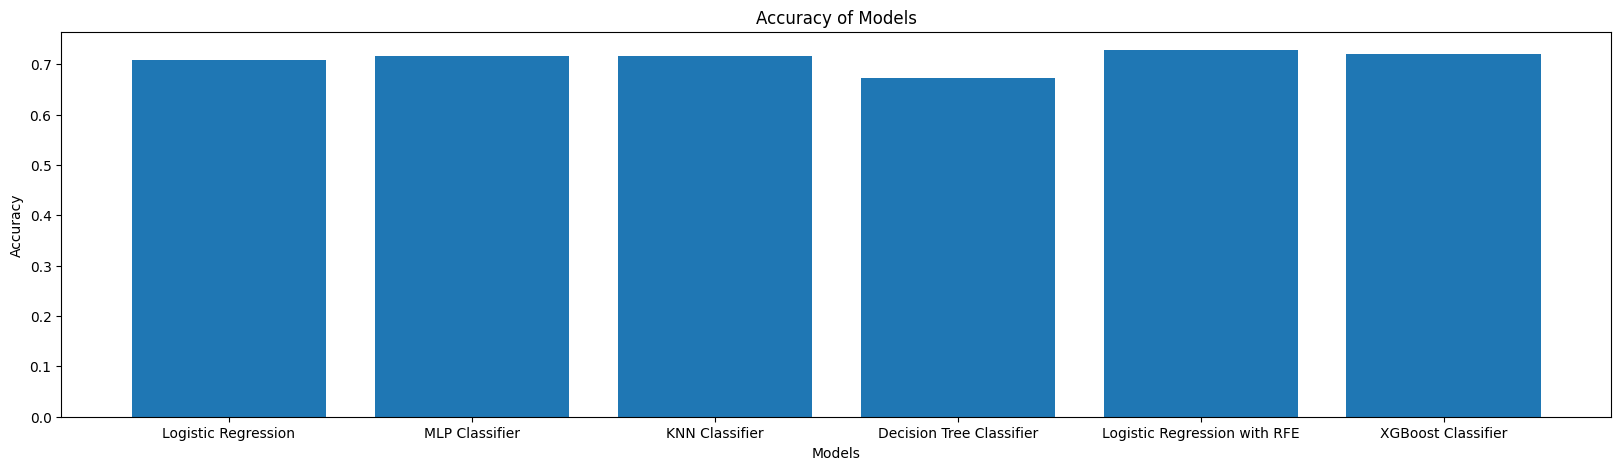

In [ ]:
""" show all models accuracy in a bar chart """
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'MLP Classifier', 'KNN Classifier', 'Decision Tree Classifier',
            'Logistic Regression with RFE', 'XGBoost Classifier'] # Create a list of models
accuracies = [log_reg_accuracy, mlp_accuracy, knn_accuracy, dt_accuracy, log_reg_rfe_accuracy, xgb_accuracy] # Create a list of accuracies
plt.figure(figsize=(20, 5))
plt.bar(models, accuracies) # Plot the bar chart
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()
